In [74]:
import numpy as np
import matplotlib.pyplot as plt

$$
\begin{align}
x_0 &= x_0 + v_0 *  dt \\
v_0 &= v_0 + a * dt \\
x_1 & = x_1 + v_1 * dt \\
v_1 & = v_1 + \frac{-k}{m}(x_1 - x_0) - \frac{-c}{m} * v_1
\end{align}
$$


In [79]:
class MyModel:
    def __init__(self, ix, m, c, k, w, dt):
        dF = np.array([
                [0.,    1.,   0.,   0.],
                [0.,    0.,   0.,   0.],
                [0.,    0.,   0.,   1.],
                [+k/m,  0., -k/m, -c/m]])
        self.G = np.array([[dt**2/2], [dt], [0], [0]])
        self.H = np.array([[0.], [0.], [1.], [0.]])
        self.F = np.eye(4) + dt * dF
        self.w = w * dt
        self.x = ix.copy()
        self.x_hist = self.x.copy()
        self.dt = dt
        self.t = 0
        self.t_hist = [0]

    def update(self, u):
        u *= self.dt
        self.x = self.F @ self.x + u + self.G*np.random.normal(0, self.w)
        self.x_hist = np.c_[self.x_hist, self.x]
        self.t += self.dt
        self.t_hist.append(self.t)

In [80]:
dt = 0.001  # 時間分解能
m = 1       # 質量 [kg] 非負
c = 1       # 減衰係数 [N/m] 非負
k = 10      # バネ係数 [Ns/m] 非負
w  = 1      # 外乱
ix = np.array([[0.], [0.], [0.], [0.]]) # 初期状態

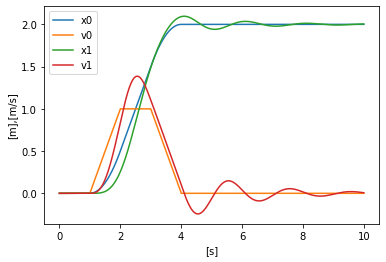

In [85]:
model = MyModel(ix, m, c, k, w, dt)

for t in np.arange(0, 10, dt):
    if t >= 1 and t < 2:
        u = np.array([[0.], [1.], [0.], [0.]])
    elif t >= 3 and t < 4:
        u = np.array([[0.], [-1.], [0.], [0.]])
    else:
        u = np.array([[0.], [0.], [0.], [0.]])
    model.update(u)

plt.plot(model.t_hist, model.x_hist[0,:], label='x0')
plt.plot(model.t_hist, model.x_hist[1,:], label='v0')
plt.plot(model.t_hist, model.x_hist[2,:], label='x1')
plt.plot(model.t_hist, model.x_hist[3,:], label='v1')
plt.xlabel('[s]')
plt.ylabel('[m],[m/s]')

plt.legend()

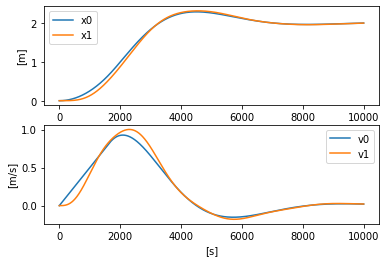

In [105]:
model = MyModel(ix, m, c, k, w, dt)

Kp = 1
Ki = 1

target = 2.0
a = 0
max_a = 0.5
max_v = 1
for t in np.arange(0, 10, dt):
    x = model.x[0][0]
    v = model.x[1][0]
    a = (target - x) * Kp - v*Ki
    if a >  max_a: a = max_a
    if a < -max_a: a = -max_a
#   acc = 1.0 if x < target else -1.0
    if v >  max_v and a > 0: a = 0
    if v < -max_v and a < 0: a = 0
    model.update(np.array([[0.], [a], [0.], [0.]]))

plt.subplot(211)
plt.plot(model.x_hist[0,:], label='x0')
plt.plot(model.x_hist[2,:], label='x1')
plt.legend()
plt.xlabel('[s]')
plt.ylabel('[m]')
plt.subplot(212)
plt.plot(model.x_hist[1,:], label='v0')
plt.plot(model.x_hist[3,:], label='v1')
plt.xlabel('[s]')
plt.ylabel('[m/s]')
plt.legend()

model0 = model

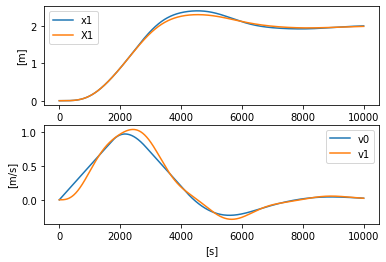

In [109]:
model = MyModel(ix, m, c, k, w, dt)

Kp = 1
Ki = 1

target = 2.0
a = 0
max_a = 0.5
max_v = 1
for t in np.arange(0, 10, dt):
    x = model.x[2][0]
    v = model.x[1][0]
    a = (target - x) * Kp - v*Ki
    if a >  max_a: a = max_a
    if a < -max_a: a = -max_a
#   acc = 1.0 if x < target else -1.0
    if v >  max_v and a > 0: a = 0
    if v < -max_v and a < 0: a = 0
    model.update(np.array([[0.], [a], [0.], [0.]]))

plt.subplot(211)
#plt.plot(model.x_hist[0,:], label='x0')
plt.plot(model.x_hist[2,:], label='x1')
#plt.plot(model0.x_hist[0,:], label='X0')
plt.plot(model0.x_hist[2,:], label='X1')
plt.legend()
plt.xlabel('[s]')
plt.ylabel('[m]')
plt.subplot(212)
plt.plot(model.x_hist[1,:], label='v0')
plt.plot(model.x_hist[3,:], label='v1')
plt.xlabel('[s]')
plt.ylabel('[m/s]')
plt.legend()

In [107]:
dF = np.array([
    [0.,    1.,   0.,   0.],
    [0.,    0.,   0.,   0.],
    [0.,    0.,   0.,   1.],
    [+k/m,  0., -k/m, -c/m]])


G = np.array([[dt**2/2], [dt], [0], [0]])

H = np.array([[0.], [0.], [1.], [0.]])

In [67]:
F = np.eye(4) + dt * dF

In [68]:
x = np.array([[0.], [0.], [0.1], [0.]])
z = np.array([[0.], [0.], [0.], [0.]])
x_hist = np.ndarray((4, 0))
z_hist = np.ndarray((4, 0))
for t in np.arange(0, 10, dt):
    if t >= 1 and t < 2:
        u = np.array([[0.], [0.1], [0.], [0.]])
    elif t >= 3 and t < 4:
        u = np.array([[0.], [-0.1], [0.], [0.]])
    else:
        u = np.array([[0.], [0.], [0.], [0.]])
    
    x_hist = np.c_[x_hist, x]
    z_hist = np.c_[z_hist, z]
    x = F @ x + u + G*np.random.normal(0, w)
    z = x

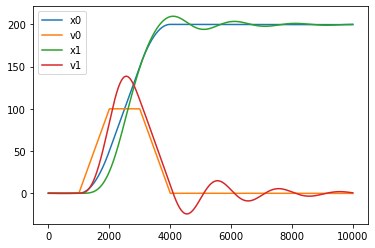

In [69]:
plt.plot(x_hist[0,:], label='x0')
plt.plot(x_hist[1,:], label='v0')
plt.plot(x_hist[2,:], label='x1')
plt.plot(x_hist[3,:], label='v1')
plt.legend()

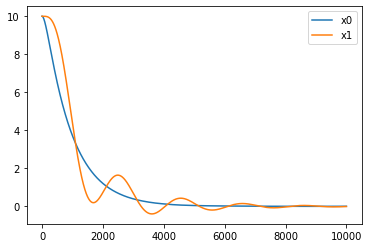

In [70]:
x = np.array([[10.], [0.], [10.], [0.]])
z = np.array([[10.], [0.], [10.], [0.]])
x_hist = np.ndarray((4, 0))
z_hist = np.ndarray((4, 0))
for t in np.arange(0, 10, dt):
    xx = x[0][0]
    vv = x[1][0]
    u = np.array([[0.], [-0.01*xx - 0.01*vv], [0.], [0.]])
    
    x_hist = np.c_[x_hist, x]
    z_hist = np.c_[z_hist, z]
    x = F @ x + u + G*np.random.normal(0, w)
    z = x

te=10000
plt.plot(x_hist[0,:te], label='x0')
#plt.plot(x_hist[1,:te], label='v0')
plt.plot(x_hist[2,:te], label='x1')
#plt.plot(x_hist[3,:te], label='v1')
plt.legend()

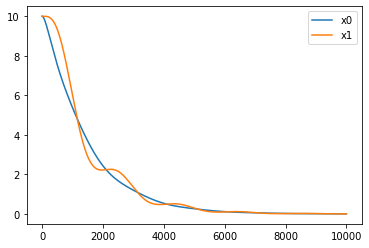

In [71]:
x = np.array([[10.], [0.], [10.], [0.]])
z = np.array([[10.], [0.], [10.], [0.]])
x_hist = np.ndarray((4, 0))
z_hist = np.ndarray((4, 0))
for t in np.arange(0, 10, dt):
    xx = x[0][0]
    vv = x[1][0]
    x2 = x[2][0]
    v2 = x[2][0]
    u = np.array([[0.], [-0.01*xx -0.007*x2 - 0.01*vv + 0.01*v2 ], [0.], [0.]])
    
    x_hist = np.c_[x_hist, x]
    z_hist = np.c_[z_hist, z]
    x = F @ x + u + G*np.random.normal(0, w)
    z = x
te=10000
plt.plot(x_hist[0,:te], label='x0')
#plt.plot(x_hist[1,:te], label='v0')
plt.plot(x_hist[2,:te], label='x1')
#plt.plot(x_hist[3,:te], label='v1')
plt.legend()